# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import rc
import matplotlib.transforms as transforms
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
import config

# Set constants

In [2]:
# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

# set figure details
figsize = (10, 10)
dpi = 200

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

filename = "PCA.svg"

# Import data

In [3]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
y = pd.read_csv(os.path.join(config.CLEAN_DIR, "is_healthy.csv"), index_col=[0, 1])
display(X.head())
display(y.head())

k__Archaea  k__Archaea|p__Euryarchaeota  \
Study_ID Sample Accession                                            
GMHI-23  SAMEA3879547        0.019774                     0.019774   
         SAMEA3879551        0.000000                     0.000000   
         SAMEA3879543        0.003253                     0.003253   
         SAMEA3879565        0.008863                     0.008863   
         SAMEA3879546        0.000048                     0.000048   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Study_ID Sample Accession                                                   
GMHI-23  SAMEA3879547                                            0.019774   
         SAMEA3879551                                            0.000000   
         SAMEA3879543                                            0.003253   
         SAMEA3879565                                            0.008863   
         SAMEA3879546                                            0.000048   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Study_ID Sample Accession                                                                         
GMHI-23  SAMEA3879547                                               0.019774                      
         SAMEA3879551                                               0.000000                      
         SAMEA3879543                                               0.003253                      
         SAMEA3879565                                               0.008863                      
         SAMEA3879546                                               0.000048                      

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Study_ID Sample Accession                                                                                                
GMHI-23  SAMEA3879547                                               0.019774                                             
         SAMEA3879551                                               0.000000                                             
         SAMEA3879543                                               0.003253                                             
         SAMEA3879565                                               0.008863                                             
         SAMEA3879546                                               0.000048                                             

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Study_ID Sample Accession                                                                                                                      
GMHI-23  SAMEA3879547                                               0.019774                                                                   
         SAMEA3879551                                               0.000000                                                                   
         SAMEA3879543                                               0.003253                                                                   
         SAMEA3879565                                               0.008863                                                                   
         SAMEA3879546                                               0.000048                                                                   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                                                                                                                                    
GMHI-23  SAMEA3879547                                               0.019774              

PHENOTYPE:Healthy_Nonhealthy
Study_ID Sample Accession                              
GMHI-23  SAMEA3879547                              True
         SAMEA3879551                              True
         SAMEA3879543                              True
         SAMEA3879565                              True
         SAMEA3879546                              True

# Dimensionality reduction

In [4]:
pca = PCA(random_state=42, n_components=2)
pca.fit(X > config.PRESENCE_CUTOFF)
PC1_variance, PC2_variance = pca.explained_variance_[:2]
embedding = pca.transform(X > config.PRESENCE_CUTOFF)
embedding

array([[-2.33874233,  2.01723163],
       [-0.54680895, -2.75610672],
       [-3.3937862 , -1.38205085],
       ...,
       [ 4.54710953,  2.38198436],
       [ 2.65783574,  1.90978083],
       [ 2.64566329,  0.33852712]])

# Plot!

In [5]:
# https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

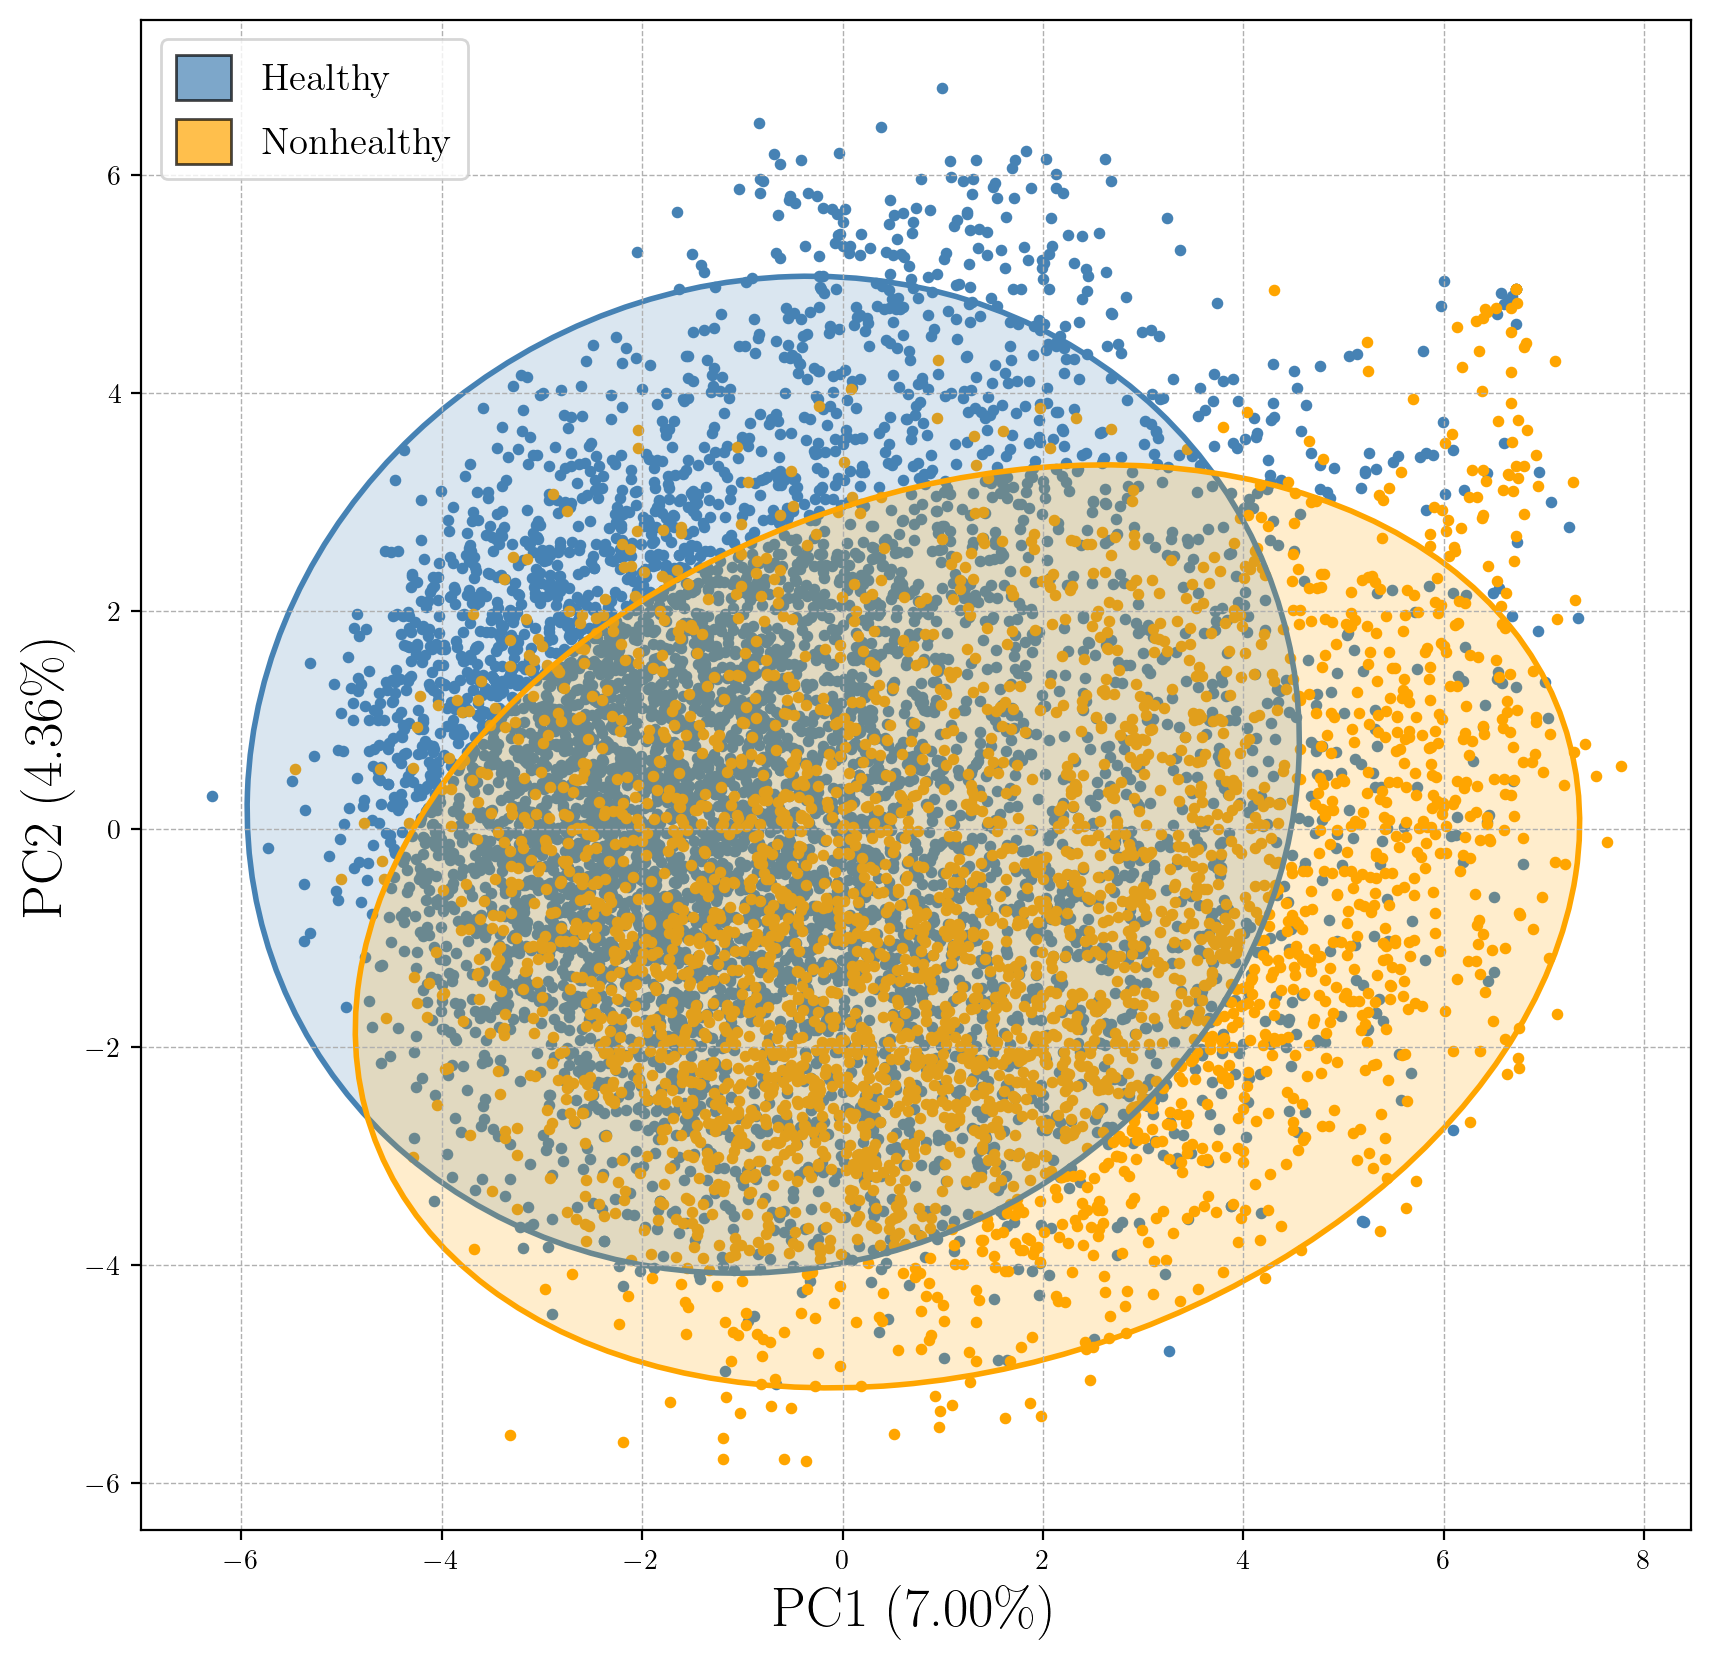

In [6]:
plt.figure(figsize=(10, 10), dpi=200)

PC1_healthy, PC2_healthy = embedding[y.values.flatten(), 0], embedding[y.values.flatten(), 1]

PC1_nonhealthy, PC2_nonhealthy = embedding[~y.values.flatten(), 0], embedding[~y.values.flatten(), 1]

dot_alpha = 1
dot_size = 10
plt.scatter(PC1_healthy, PC2_healthy, alpha=dot_alpha, s=dot_size, label="Healthy", color=healthy_color)
plt.scatter(PC1_nonhealthy, PC2_nonhealthy, alpha=dot_alpha, s=dot_size, label="Nonhealthy", color=nonhealthy_color)

# 2.25 standard deviations is about 95% confidence in 2D
n_std = 2.25
confidence_ellipse(PC1_healthy, PC2_healthy, plt.gca(), n_std=n_std,
                   alpha=1, edgecolor=healthy_color, lw=2)
confidence_ellipse(PC1_healthy, PC2_healthy, plt.gca(), n_std=n_std,
                   alpha=0.2, facecolor=healthy_color)

confidence_ellipse(PC1_nonhealthy, PC2_nonhealthy, plt.gca(), n_std=n_std,
                   alpha=1, edgecolor=nonhealthy_color, lw=2)
confidence_ellipse(PC1_nonhealthy, PC2_nonhealthy, plt.gca(), n_std=n_std,
                   alpha=0.2, facecolor=nonhealthy_color)

plt.xlabel(f"PC1 ({'{:.2f}'.format(PC1_variance)}\%)", fontsize=20)
plt.ylabel(f"PC2 ({'{:.2f}'.format(PC2_variance)}\%)", fontsize=20)


handles = [
    Patch(facecolor=healthy_color, edgecolor="k", label="Healthy", alpha=0.7),
    Patch(facecolor=nonhealthy_color, edgecolor="k", label="Nonhealthy", alpha=0.7),
]

plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(handles=handles, prop={'size': 14}, loc=2, handlelength=1.4, handleheight=1.4)
plt.savefig(os.path.join(config.FIGURE_DIR, filename))